# Lab2: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
%matplotlib inline

### Read the csv data into a pandas dataframe and display the first 5 samples

In [4]:
df = pd.read_csv('Real estate.csv')
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [15]:
print(df.sample)

<bound method NDFrame.sample of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4  

### What are the features available in the dataset?

In [19]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [20]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [23]:
x = df[['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area']]

### Group feature(s) as independent features in y

In [21]:
y = df['Y house price of unit area']


In [25]:
x.shape, y.shape


((414, 8), (414,))

### Split the dataset into train and test data

In [32]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [26]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(351, 8) (351,)
(63, 8) (63,)


### Choose the model (Linear Regression)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

### Create an Estimator object

In [60]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [61]:
print(model)

LinearRegression(normalize=True)


### Train the model

In [56]:
model.fit(x_train,y_train)

LinearRegression()

### Apply the model

In [73]:
model.fit(x,y)

LinearRegression(normalize=True)

In [92]:
prediction = model.predict(x_train)

In [93]:
prediction[1]

11.200000000000026

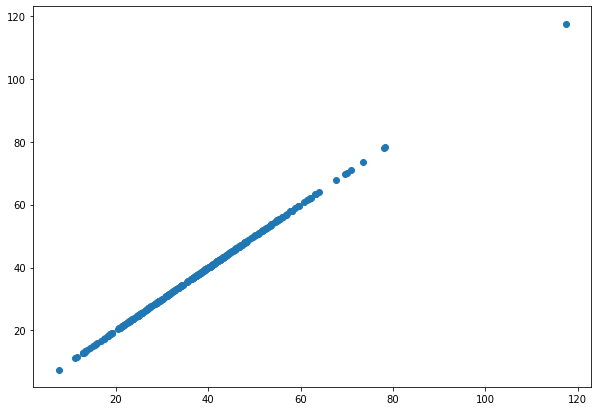

In [94]:
plt.figure(figsize = (10,7))
plt.scatter(y_train,prediction)

### Display the coefficients

In [31]:
model.coef_

array([-5.40708955e-15, -4.18248769e-13,  6.21031004e-16, -2.77555756e-17,
        9.11597187e-16, -4.59873974e-14,  4.27284423e-14,  1.00000000e+00])

In [33]:
df_coef = pd.DataFrame(model.coef_,x.columns,columns = ['coeffic value'])
df_coef

,coeffic value
No,-5.407090e-15
X1 transaction date,-4.182488e-13
X2 house age,6.210310e-16
X3 distance to the nearest MRT station,-2.775558e-17
X4 number of convenience stores,9.115972e-16
X5 latitude,-4.598740e-14
X6 longitude,4.272844e-14
Y house price of unit area,1.000000e+00


In [36]:
model.intercept_

8.391083383685327e-10

### Find how well the trained model did with testing data

In [95]:
from sklearn import metrics

In [97]:
mse = metrics.mean_squared_error(y_train,prediction)
mse

2.2290377373168075e-28

In [98]:
RMSE = np.sqrt(mse)
RMSE

1.4929962281656333e-14

### Plot House Age Vs Price
#### Hint: Use regplot in sns

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

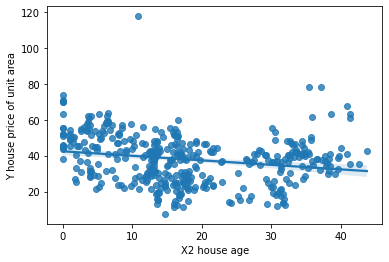

In [41]:
sns.regplot(x='X2 house age',y='Y house price of unit area',data=df)

### Plot Distance to MRT station Vs Price

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

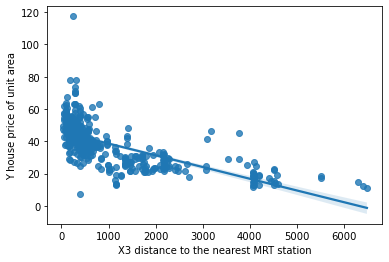

In [46]:
sns.regplot(x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=df)

### Plot Number of Convienience Stores Vs Price

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

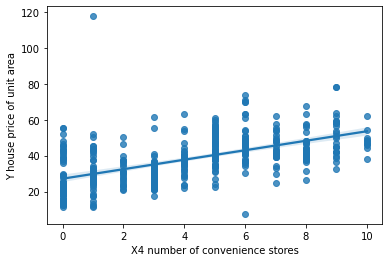

In [48]:
sns.regplot(x='X4 number of convenience stores',y='Y house price of unit area',data=df)